In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set()

### 1. Extract, transform, and load (ETL) the CSV data and cleanup null and @NA values.

In [261]:
# Read in admissions and claims
adms = pd.read_csv("admissions.csv", parse_dates=["AdmitDate"])
claims = pd.read_csv("claims.csv", parse_dates=["AdmitDate"])

In [14]:
adms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 3 columns):
Patient      5849 non-null object
AdmitDate    5849 non-null datetime64[ns]
LOS          5849 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 137.2+ KB


In [255]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 8 columns):
Patient          5849 non-null object
AdmitDate        5849 non-null datetime64[ns]
Age              5849 non-null int64
Gender           5849 non-null object
PrimaryDx        5849 non-null object
Dx2              5849 non-null object
Dx3              3883 non-null object
PastPCPVisits    5849 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 365.7+ KB


In [16]:
adms.head()

,Patient,AdmitDate,LOS
0,5e982461-47d7-4ae9-ac75-d1f31acaee81,2015-09-12,9
1,61e049c2-08e8-469a-a1e0-808d99c084fd,2015-03-23,7
2,19bccbe8-0bc7-4dd5-8066-de5bd76acdff,2015-11-07,7
3,520d5129-fa07-45a3-9108-f6fa895c0169,2015-01-24,7
4,e7af2ac0-bd25-4cfe-a6f2-e6642db02f64,2015-09-08,5


In [256]:
claims.head()

,Patient,AdmitDate,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits
0,5e982461-47d7-4ae9-ac75-d1f31acaee81,2015-09-12,74,M,N18,T88,NaN,19
1,61e049c2-08e8-469a-a1e0-808d99c084fd,2015-03-23,71,F,N18,R39,@NA,3
2,19bccbe8-0bc7-4dd5-8066-de5bd76acdff,2015-11-07,85,M,E11,R39,NaN,10
3,520d5129-fa07-45a3-9108-f6fa895c0169,2015-01-24,67,F,N18,F05,NaN,8
4,e7af2ac0-bd25-4cfe-a6f2-e6642db02f64,2015-09-08,78,F,A41,T88,J18,13


In [257]:
# Find unique values in Dx, Dx2, Dx3
print(claims.PrimaryDx.unique())
print(claims.Dx2.unique())
print(claims.Dx3.unique())

['N18' 'E11' 'A41' 'I50' 'J44' 'N39']
['T88' 'R39' 'F05' 'G31' 'F03' 'E11' 'M54' 'I51' 'E86' 'R41' 'F19' 'W19']
[nan '@NA' 'J18' 'R26' 'R05' 'R51' 'J45' 'E11' 'I10' 'M54' 'E56' 'G89'
 'H53' 'H91']


In [262]:
nandict = {"@NA": np.nan}
claims["Dx3"] = claims.Dx3.replace(nandict)

In [263]:
print(claims.Dx3.unique())

[nan 'J18' 'R26' 'R05' 'R51' 'J45' 'E11' 'I10' 'M54' 'E56' 'G89' 'H53'
 'H91']


###   2. Determine patients that have a readmission.

In [266]:
print("There are", adms.Patient.nunique(), "unique patients.")

There are 3917 unique patients.


In [267]:
# Get a dataframe of patients who has been readmitted

multvisit = adms.Patient.value_counts()
mult_list = multvisit[multvisit > 1].index.tolist()

In [268]:
print("There are" , len(mult_list), "patients who had been admitted more than once.",
      "We will look at their admission dates.")

There are 1932 patients who had been admitted more than once. We will look at their admission dates.


In [269]:
print("These are a few id's of patients who got readmitted", mult_list[:3])
adms[adms.Patient=="00b916a6-4a63-42bf-a466-5c41e53d51a4"]

These are a few id's of patients who got readmitted ['ee79a665-8556-4532-8203-146135cf0585', 'cd6eda62-e326-4634-beaf-8322ae238215', '3ec942b6-438a-4df5-a461-d5141a38e501']


,Patient,AdmitDate,LOS
3622,00b916a6-4a63-42bf-a466-5c41e53d51a4,2016-10-21,7
4549,00b916a6-4a63-42bf-a466-5c41e53d51a4,2016-10-28,7


In [270]:
adm_mult = adms[adms.Patient.isin(mult_list)]
combined=adm_mult.merge(claims, how="left", on =["Patient", "AdmitDate"]).sort_values("Patient")
combined.head()

,Patient,AdmitDate,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits
2564,00b916a6-4a63-42bf-a466-5c41e53d51a4,2016-10-28,7,72,M,J44,I51,NaN,21
1780,00b916a6-4a63-42bf-a466-5c41e53d51a4,2016-10-21,7,72,M,N18,F03,NaN,19
1998,00bb6e1f-e046-4f59-a049-968c337117f5,2015-08-31,5,77,F,N18,R41,NaN,21
57,00bb6e1f-e046-4f59-a049-968c337117f5,2015-08-19,5,77,F,I50,T88,NaN,19
2287,00c19e0e-b1e1-4ab1-91fb-af22c0c30a86,2016-05-21,9,75,F,E11,E86,NaN,22


In [205]:
readmitted_set=set()  # This will contain a set of patients who had been readmitted

# Iterate over a list of patients who had been admitted more than once
for patient in mult_list:
    
    # Per patient, get sorted admitted dates 
    single_patient_dates = combined[combined.Patient == patient].AdmitDate.sort_values()
    
    for i in range(len(single_patient_dates)-1):
        
        # From ordered dates, check if the difference in admitted dates is less than or equal to 30 days
        if (single_patient_dates.iloc[i+1]-single_patient_dates.iloc[i] <= pd.Timedelta('30 days')):
            readmitted_set.add(patient)
            # can optimize it better
    
    

In [271]:
print("These are", len(readmitted_set), "readmitted patients")

These are 1378 readmitted patients


In [272]:
readmitted_list=list(readmitted_set)
print(readmitted_list[:3])
combined[combined.Patient == "524932eb-d022-4c10-9bec-dbb94953092a"]

['00b916a6-4a63-42bf-a466-5c41e53d51a4', '524932eb-d022-4c10-9bec-dbb94953092a', 'ec0a5237-9db6-4864-b56a-3dba0af9f9b0']


,Patient,AdmitDate,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits
1994,524932eb-d022-4c10-9bec-dbb94953092a,2015-09-20,6,81,M,N18,F05,NaN,22
1201,524932eb-d022-4c10-9bec-dbb94953092a,2015-09-15,3,81,M,A41,F03,NaN,20


  ### 3. Provide univariate analysis on each potential feature.

In [273]:
adm_re = adms[adms.Patient.isin(readmitted_list)]
combined_re=adm_re.merge(claims, how="left", on =["Patient", "AdmitDate"]).sort_values("Patient")

In [274]:
combined_re.head(10)

,Patient,AdmitDate,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits
1838,00b916a6-4a63-42bf-a466-5c41e53d51a4,2016-10-28,7,72,M,J44,I51,NaN,21
1270,00b916a6-4a63-42bf-a466-5c41e53d51a4,2016-10-21,7,72,M,N18,F03,NaN,19
1431,00bb6e1f-e046-4f59-a049-968c337117f5,2015-08-31,5,77,F,N18,R41,NaN,21
42,00bb6e1f-e046-4f59-a049-968c337117f5,2015-08-19,5,77,F,I50,T88,NaN,19
1359,00c19e0e-b1e1-4ab1-91fb-af22c0c30a86,2016-05-03,5,75,F,A41,T88,NaN,20
1645,00c19e0e-b1e1-4ab1-91fb-af22c0c30a86,2016-05-21,9,75,F,E11,E86,NaN,22
815,010ceb21-cdae-4eec-9e82-571f52784ba1,2015-09-28,9,75,M,A41,T88,R51,8
2483,010ceb21-cdae-4eec-9e82-571f52784ba1,2015-10-19,7,75,M,J44,F03,NaN,10
1134,013ec476-343d-49c1-9025-ba58bec1397c,2015-09-19,7,79,M,N18,R41,NaN,10
1973,013ec476-343d-49c1-9025-ba58bec1397c,2015-10-06,7,79,M,N18,T88,NaN,12


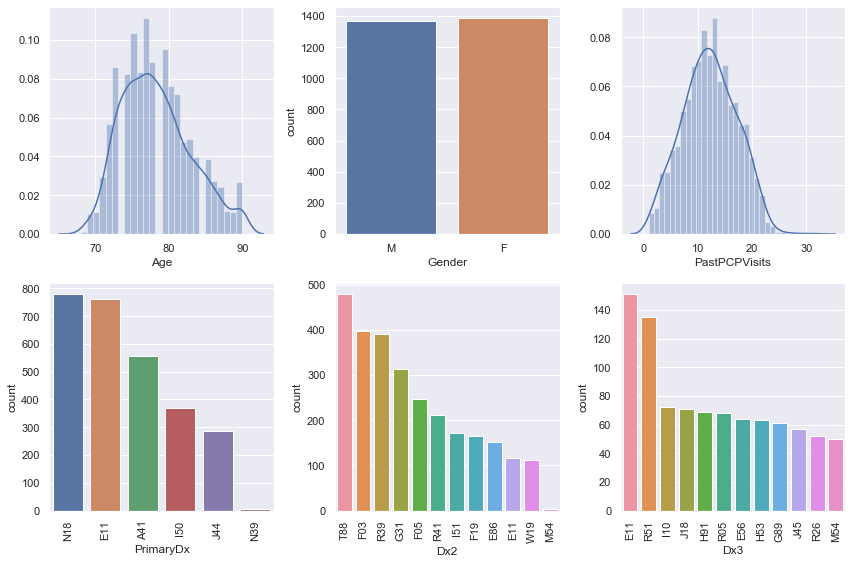

In [336]:
plt.subplots(figsize=(12,8))
plt.subplot(2,3,1)
plt.xlabel("Age")
sns.distplot(combined_re.Age)

plt.subplot(2,3,2)
plt.xlabel("Gender")
sns.countplot(combined_re.Gender)

plt.subplot(2,3,3)
plt.xlabel("PastPCPVisits")
sns.distplot(combined_re.PastPCPVisits)


plt.subplot(2,3,4)
plt.xlabel("PrimaryDx")
plt.xticks(rotation=90)
sns.countplot(combined_re.PrimaryDx, order = combined_re.PrimaryDx.value_counts().index)

plt.subplot(2,3,5)
plt.xlabel("Dx2")
plt.xticks(rotation=90)
#combined.Dx2.hist()
sns.countplot(combined_re.Dx2, order = combined_re.Dx2.value_counts().index)

plt.subplot(2,3,6)
plt.xlabel("Dx3")
plt.xticks(rotation=90)
sns.countplot(combined_re.Dx3, order = combined_re.Dx3.value_counts().index)
plt.tight_layout()

plt.show()



Admitted codes seem to matter. 
The ratio of gender is almost 1 to 1.  
Age and PCPvisits have high peaks, but these are probably following normal distribution

In [303]:
claims.set_index(["AdmitDate"])["2015"].sort_index()

,Patient,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits
AdmitDate,,,,,,,
2015-01-01,fd9b56cc-9739-4899-bfe5-e69c3843e4a0,85,F,N18,T88,E56,19
2015-01-01,72eba4c9-5bd0-4cd9-818d-97cda3121640,72,F,I50,G31,NaN,4
2015-01-02,8def87a3-600d-478e-844f-2a9c53aff5f1,70,F,I50,F03,NaN,16
2015-01-02,4b808b90-7771-4a27-b2e4-feea0e0040f8,84,F,A41,F03,I10,12
2015-01-02,8d27b3e0-6aa5-4a6f-9243-316fcaeea471,80,M,N18,T88,NaN,5
...,...,...,...,...,...,...,...
2015-12-31,7ed7f908-fd8a-45c6-b5f7-9aa2b7c6a013,81,M,A41,F03,NaN,15
2015-12-31,07c45156-720f-4e1b-8179-592e1864c9d2,84,M,N18,F05,NaN,17
2015-12-31,1369e560-cd03-4704-89b4-f5421b4477bd,79,F,E11,I51,NaN,24


 ### 4. Fit/train a model that predicts readmissions using admissions that occurred in 2015. 

In [455]:
# binary classification but won't work nice when there are too manhy categorical variables 
# from sklearn.linear_model import LogisticRegression
# xgboost not installed on my computer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve


In [404]:
fulllist = adms.merge(claims, how="left", on=["Patient", "AdmitDate"])
fulllist["readmitted"] = fulllist.Patient.isin(readmitted_list).astype(int)

In [405]:
fulllist

,Patient,AdmitDate,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits,readmitted
0,5e982461-47d7-4ae9-ac75-d1f31acaee81,2015-09-12,9,74,M,N18,T88,NaN,19,1
1,61e049c2-08e8-469a-a1e0-808d99c084fd,2015-03-23,7,71,F,N18,R39,NaN,3,0
2,19bccbe8-0bc7-4dd5-8066-de5bd76acdff,2015-11-07,7,85,M,E11,R39,NaN,10,1
3,520d5129-fa07-45a3-9108-f6fa895c0169,2015-01-24,7,67,F,N18,F05,NaN,8,0
4,e7af2ac0-bd25-4cfe-a6f2-e6642db02f64,2015-09-08,5,78,F,A41,T88,J18,13,0
...,...,...,...,...,...,...,...,...,...,...
5844,641acfac-9bd1-4864-be0a-52d4bfc78ef9,2016-03-14,7,75,M,A41,I51,NaN,15,1
5845,e152df3f-69a5-4ad4-9cf0-a3b7a6b9d4d8,2016-12-20,5,86,M,E11,R41,NaN,17,0
5846,a45e1bab-df5f-4078-b938-31f920e2f765,2016-09-18,9,78,M,A41,I51,R05,14,0
5847,963fdb5d-bfe6-47c9-84c8-6456ce0fd093,2017-01-19,6,81,M,J44,F05,NaN,17,0


In [381]:
# This includes the info of patients who got admitted at the end of 2015 and readmitted 2016
fulllist.set_index("AdmitDate")["2015"].sort_index().tail()

,Patient,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits,readmitted
AdmitDate,,,,,,,,,
2015-12-31,7ed7f908-fd8a-45c6-b5f7-9aa2b7c6a013,3,81,M,A41,F03,NaN,15,0
2015-12-31,07c45156-720f-4e1b-8179-592e1864c9d2,10,84,M,N18,F05,NaN,17,1
2015-12-31,1369e560-cd03-4704-89b4-f5421b4477bd,6,79,F,E11,I51,NaN,24,0
2015-12-31,397b905a-2f36-453e-8e9a-d659dbfd0737,7,76,M,E11,F03,M54,16,0
2015-12-31,49101382-d87b-4e75-b632-00c8369efb68,7,73,M,E11,F05,H91,19,0


In [382]:
fulllist[fulllist.Patient=="07c45156-720f-4e1b-8179-592e1864c9d2"]

,Patient,AdmitDate,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits,readmitted
1583,07c45156-720f-4e1b-8179-592e1864c9d2,2015-12-31,10,84,M,N18,F05,NaN,17,1
3924,07c45156-720f-4e1b-8179-592e1864c9d2,2016-01-06,9,84,M,N18,F03,NaN,19,1


In [406]:
fulllist["G"] = pd.get_dummies(fulllist.Gender, drop_first=True)
fulllist = pd.concat([fulllist, pd.get_dummies(fulllist.PrimaryDx, drop_first=True)], axis=1)
col0=["Patient", "AdmitDate", "LOS", "Age", "Gender", "PrimaryDx", 
      "Dx2", "Dx3", "PastPCPVisits", "readmitted", "G"]
col1=["Dx1_1","Dx1_2","Dx1_3","Dx1_4", "Dx1_5"]
fulllist.columns=col0+col1




In [407]:
fulllist = pd.concat([fulllist, pd.get_dummies(fulllist.Dx2, drop_first=True)], axis=1)
col2=["Dx2_1", "Dx2_2", "Dx2_3", "Dx2_4", "Dx2_5", "Dx2_6", 
                    "Dx2_7", "Dx2_8", "Dx2_9", "Dx2_10", "Dx2_11"]
fulllist.columns=col0+col1+col2

In [409]:
# Split the data by year
full2015 = fulllist.set_index("AdmitDate")["2015"]
full2016 = fulllist.set_index("AdmitDate")["2016"]
# There are some in 2017
# full2017 = fulllist.set_index("AdmitDate")["2017"]

In [410]:
fulllist.head(2)

,Patient,AdmitDate,LOS,Age,Gender,PrimaryDx,Dx2,Dx3,PastPCPVisits,readmitted,...,Dx2_2,Dx2_3,Dx2_4,Dx2_5,Dx2_6,Dx2_7,Dx2_8,Dx2_9,Dx2_10,Dx2_11
0,5e982461-47d7-4ae9-ac75-d1f31acaee81,2015-09-12,9,74,M,N18,T88,NaN,19,1,...,0,0,0,0,0,0,0,0,1,0
1,61e049c2-08e8-469a-a1e0-808d99c084fd,2015-03-23,7,71,F,N18,R39,NaN,3,0,...,0,0,0,0,0,0,1,0,0,0


In [438]:
# Create one dataframe for data training
X=full2015.drop(["Patient", "Gender", "PrimaryDx", "Dx2", "Dx3", "readmitted"], axis=1)
y=full2015.readmitted             
              
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [449]:
GB= GradientBoostingClassifier(n_estimators=100,max_depth=5)
GB.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [451]:
print("Accuracy score (training): {0:.3f}".format(GB.score(X_train, y_train)))

Accuracy score (training): 0.848


In [452]:
prediction_val = GB.predict(X_val)

In [446]:
print("Accuracy score (training): {0:.3f}".format(GB.score(X_val, y_val)))


Accuracy score (training): 0.728


In [453]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, prediction_val))


Confusion Matrix:
[[214 143]
 [ 59 298]]


###  5. Evalumate the model using admissions in 2016 as the test set and provide performance metrics.


In [454]:
X_test=full2016.drop(["Patient", "Gender", "PrimaryDx", "Dx2", "Dx3", "readmitted"], axis=1)
y_test=full2016.readmitted   
prediction_test=GB.predict(X_test)
print("Accuracy score (training): {0:.3f}".format(GB.score(X_test, y_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction_test))


Accuracy score (training): 0.617
Confusion Matrix:
[[909 659]
 [465 905]]


In [ ]:
roc_curve(y_test, scores, pos_label=2)